<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/ib_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 467 (delta 34), reused 0 (delta 0), pack-reused 382
Receiving objects: 100% (467/467), 1.93 MiB | 4.17 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [0]:
cd 575/src/data_IB_project

/content/575/src/data_IB_project


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import t

In [0]:
'''
#get weekly interest rate change factor for coupon bond
def getdata(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:293]]
      DD=[float(d)/100/2 for d in DD]
      D=[row[2] for row in rows[1+N:250+N]]
      D=[float(d)/100/2 for d in D]
      return DD,D
      #print(D)
      #print(D[0])


In [0]:
#get weekly interest rate change factor for coupon bond
def getdata(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:62]]
      DD=[float(d)/100/2 for d in DD]     #continuous compounded interest rate 
      D=[row[2] for row in rows[1+N:53+N]]
      D=[float(d)/100/2 for d in D]   #risk factor change
      return DD,D

In [0]:
'''
test1=getdata('bond1',0)
kk = t.fit(test1[1])
print(kk[0])
print(kk[1])
print(kk[2])
nn=norm.fit(test1[1])
print(nn[0])
print(nn[1])
E=np.mean(test1[1])
print(E)

2.0272787924820648
-0.00010279419664695968
0.00025628701298503385
-8.60576923076923e-05
0.000381080620052096
-8.60576923076923e-05


In [0]:
'''
g=getdata('20J28',0)[0]
print(g)
ks = norm.fit(g)
print(ks[0],ks[1])


In [0]:

# for each coupon, linloss could be calculated as L=-c*np.exp(r*t)(r*5-t*x) week=5 days
def linloss_bond(c,r,t,mu,sigma):
  exp=-c*np.exp(r*t)*(r*5-t*mu)
  #exp=-c*np.exp(r*t)*(r*1-t*mu)
  var=(np.exp(r*t)*t)**2*(sigma**2)
  return exp,var

In [0]:

def rolling_bond(day,F,c,r,mu,sigma):
  Exp=-F*np.exp(r*(day/182+15))*(r*5-(day/182+15)*mu)
  Var=(np.exp(r*(day/182+15))*(day/182+15))**2*(sigma**2)
  for i in range(0,16):
    t=day/182+i
    Exp=Exp+linloss_bond(c,r,t,mu,sigma)[0]
    Var=Var+linloss_bond(c,r,t,mu,sigma)[1]
  return Exp,Var


In [0]:
c1=1.75/100*1000/2
c2=6/100*1000/2
F1=1000

In [0]:
Bond1_mu=[]
Bond1_var=[]
Bond2_mu=[]
Bond2_var=[]
for n in range(0,10):   # estimate 2010/02/14-2020/04/17
 dd_1=getdata('bond1',n)[0]
 d_1=getdata('bond1',n)[1]
 ks_1 = norm.fit(d_1)
 r1=dd_1[51+n] 
 dd_2=getdata('bond3.625',n)[0]
 d_2=getdata('bond3.625',n)[1]
 ks_2 = norm.fit(d_2)
 r2=dd_2[51+n] 
 week_bond1=rolling_bond(159-7*n,F1,c1,r1,ks_1[0],ks_1[1])   #159=2020/07/15-2020/02/14
 Bond1_mu.append(week_bond1[0])
 Bond1_var.append(week_bond1[1])
 week_bond2=rolling_bond(182-7*n,F1,c2,r2,ks_2[0],ks_2[1])  
 Bond2_mu.append(week_bond2[0])
 Bond2_var.append(week_bond2[1])
 #print(week[0],week[1])
 #print(week[0])


In [0]:
print(Bond1_mu)
print(Bond1_var)
print(Bond2_mu)
print(Bond2_var)

[1.3168020657115707, 3.289005837349064, 6.371792178381435, 11.77538788766703, -9.248422056742587, -17.586704545032735, 1.294661141562513, 7.12953190755665, 8.49477900869689, 5.478700272366696]
[0.0002457889910209126, 0.00024171508720053275, 0.00023729352080909715, 0.0002525068626788285, 0.0008218318228104392, 0.0009150931923024108, 0.0011847284904108561, 0.0011737333097386084, 0.001158816055744269, 0.0011802863708535824]
[0.5195273966302107, 2.744067360238744, 7.740156633816925, 14.924643187375043, -12.414439799099899, -23.05119146725257, -0.3601595108727958, 7.499844908180267, 8.863422497565818, 5.077241701871107]
[0.0002530083766022384, 0.0002486028992484554, 0.0002481800849339859, 0.00026476457259763073, 0.0008406554152650169, 0.0009338283838282592, 0.0011618050204984934, 0.0011540053541670703, 0.001140687930817159, 0.0011602265035315596]


In [0]:
#put option

In [0]:
def N(x):
  cdf=norm.cdf(x,0,1)
  return cdf
def p(x):
  pdf=norm.pdf(x,0,1)
  return pdf

In [0]:
#get weekly stock price log return for option
def getdata2(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:62]]
      DD=[float(d) for d in DD]
      D=[row[2] for row in rows[1+N:53+N]]
      D=[float(d) for d in D]
      net=[row[3] for row in rows[1+N:53+N]]
      net=[float(d) for d in net]
      return DD,D,net

In [0]:
def getdata3(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:62]]
      DD=[float(d) for d in DD]
      D=[row[2] for row in rows[1+N:53+N]]
      D=[float(d) for d in D]
      return DD,D

In [0]:
'''
djx=getdata2('DIA',0)
djx1=djx[0]
djx2=djx[1]
std=np.std(djx2)
print(djx1[50])


289.362


In [0]:
'''
v_djx=[9.5,9,11.21,39.96,38.84,64.99,102.26,78.84,83.26,57.34,51.95] 
v_cat=[6.31,8.19,7.97,4.4,2.34,0.33,0.26,0.4,0.82,2.34,0.61]
v_vig=[2.05,2.68,2.25,0.14,0.44,0.29,0.29,0.05,0.03,0.07,0.02]
ir=[-0.07,-0.15,-0.28,-0.57,0.04,0.17,-0.22,-0.46,-0.5,-0.36]


In [0]:
'''
def d(S,K,r,sigma,t):
 d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
 d2=d1-sigma*np.sqrt(t)
 return d1,d2

In [0]:
def deltaput(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  delta_P=N(float(d1))-1
  return delta_P
def deltacall(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  delta_C=N(float(d1))
  return delta_C
def rhoput(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  rho_P=-K*t*np.exp(-r*t)*N(float(-d2))
  return rho_P
def rhocall(S,K,r,sigma,t):  
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  rho_C=K*t*np.exp(-r*t)*N(float(d2))
  return rho_C
def thetaput(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  theta_P=-S*sigma/(2*np.sqrt(t))*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)+r*K*np.exp(-r*t)*N(float(-d2))
  return theta_P
def thetacall(S,K,r,sigma,t):  
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  theta_C=-S*sigma/(2*np.sqrt(t))*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)-r*K*np.exp(-r*t)*N(float(d2))
  return theta_C
def vega(S,K,r,sigma,t):  
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  vega=S*np.sqrt(t)*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)
  return vega


In [0]:
djxmu=[]
djxvariance=[]
std=[]
for i in range(1,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
  djx=getdata2('DIA',i)
  ir=getdata2('IR',i)
  djx1=djx[0]   #price
  djx2=djx[1]    #log return
  djx3=djx[2]   #net return of stock
  #std=np.std(djx2)
  std.append(np.std(djx2))
  delta1=deltaput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
  theta1=thetaput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  rho1=rhoput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  vega1=vega(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  linlo1=theta1*7/250+delta1*djx3[i-1]+rho1*(ir[i]-ir[i-1])+vega1*(std[i]-std[i-1])      #adjust the subscript
  #leverage=delta*djx1[51+i-1]/v_djx[i-1]
  #djxmu.append(leverage*djx1[51+i]*np.mean(djx2))     #loss:expected mean_option=L*expected mean_stock=L*S_t*mean(log return)
  #djxvariance.append(leverage**2*(std**2))       #loss:expected variance_option=L^2*expected variance_stock=L^2*(S_t^2)*(sigma^2)
  #print(delta)
  #print(leverage)
  djxmu.append(norm.fit(linlo1)[0])
  djxvariance.append(norm.fit(linlo1)[1]) 
print(djxmu)
print(djxvariance)

In [0]:
def putoption(M):                  #today is 2020/02/14 
 mu=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   #std=np.std(djx2)
   #std.append(np.std(opt2))
   delta=deltaput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
   theta=thetaput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   rho=rhoput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vvega=vega(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   #linloss=theta1*7/250+delta1*djx3[i-1]+rho1*(ir[i]-ir[i-1])+vega1*(std[i]-std[i-1])      #adjust the subscript
   #leverage=delta*djx1[51+i-1]/v_djx[i-1]
   #djxmu.append(leverage*djx1[51+i]*np.mean(djx2))     #loss:expected mean_option=L*expected mean_stock=L*S_t*mean(log return)
   #djxvariance.append(leverage**2*(std**2))       #loss:expected variance_option=L^2*expected variance_stock=L^2*(S_t^2)*(sigma^2)
   #print(delta)
   #print(leverage)
   mu.append(-(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1)))
   variance.append(delta**2*(np.std(opt2)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2))
   #djxmu.append(norm.fit(linlo1)[0])
   #djxvariance.append(norm.fit(linlo1)[1]) 
 return mu,variance
 

In [0]:
def calloption(M):                  #today is 2020/02/14 
 mu=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   delta=deltacall(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
   theta=thetacall(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   rho=rhocall(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vvega=vega(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   mu.append(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1))
   variance.append(delta**2*(np.std(opt2)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2))
 return mu,variance
 

[-0.6350160092307895, -0.38492436226997007, -0.4611143423797177, 2.2811268937900486, -2.0396787908228724, -3.1181870671073524, -0.2764035182417477, 1.3383346280735506, 2.3254246621243433, 1.403300666492021]
[71.23288432529776, 111.06983791786263, 137.70032728148772, 182.75520870180873, 190.31504773819034, 151.35056537010323, 198.65312867164099, 198.82330859323633, 163.1860480487898, 122.52465678959774]
[10.18122487 13.12130606 14.57735282 19.6060361  15.63992995 12.64805206
 17.78634312 19.4088165  18.69651474 15.58890469]
[14.1769688  18.11078797 20.13287479 26.00621723 22.17114445 18.47242811
 24.45909671 26.08442766 24.74433528 20.82936132]


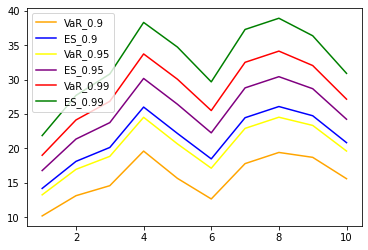

In [63]:
djx=putoption('DIA')
print(djx[0])
print(djx[1])
djxVaR1=VaRnorm(0.9,djx[0],np.sqrt(djx[1]))
djxVaR2=VaRnorm(0.95,djx[0],np.sqrt(djx[1]))
djxVaR3=VaRnorm(0.99,djx[0],np.sqrt(djx[1]))
print(djxVaR1[0])
print(djxVaR1[1])
x=np.linspace(1,10,10)
plt.plot(x,djxVaR1[0],'orange',label="VaR_0.9")
plt.plot(x,djxVaR1[1],'blue',label="ES_0.9")
plt.plot(x,djxVaR2[0],'yellow',label="VaR_0.95")
plt.plot(x,djxVaR2[1],'purple',label="ES_0.95")
plt.plot(x,djxVaR3[0],'red',label="VaR_0.99")
plt.plot(x,djxVaR3[1],'green',label="ES_0.99")
plt.legend()
plt.show()

In [0]:
cat=calloption('CAT')
print(cat[0])
print(cat[1])

[-5.093400674342e-29, -8.493235541646014e-34, -1.5671983622317926e-49, -7.519924805432236e-68, -8.883134966039866e-66, -2.3474441053581906e-70, -3.3724806478100643e-81, -7.178759452465314e-86, -6.287741076826053e-80, -2.6438246239130897e-91]
[5.0538326845394355e-57, 1.2199695082344401e-66, 2.6105272411459354e-98, 6.683304943210609e-135, 7.153724429465817e-131, 3.5934572241610448e-140, 9.029612983462612e-162, 4.044687844216846e-171, 2.8615044388741587e-159, 2.68544176087035e-182]


In [0]:
vig=calloption('VIG')
print(vig[0])
print(vig[1])

[-1.1889788974079972e-32, -3.5057834721175447e-38, -5.316959982113881e-57, -2.656800369642222e-71, -1.7791260941324516e-56, -5.858472399519143e-73, -3.751077617613279e-85, -5.100743888063845e-106, -1.1478104338004452e-97, -4.541322525151043e-94]
[3.0507583916301916e-64, 2.2963915206412427e-75, 3.07997557542051e-113, 9.510333371227893e-142, 4.19255315491006e-112, 2.478834638184193e-145, 1.239875844659196e-169, 1.7655291292016402e-211, 8.283849560457445e-195, 9.058554415254019e-188]


In [0]:
def ttt(M):                  #today is 2020/02/14 
 opt=getdata2(M,0)
 return opt


In [0]:
tttt=ttt('DIA')

In [0]:
catmu=[]
catvariance=[]
for i in range(1,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
  cat=getdata2('CAT',i)
  cat1=cat[0]   #price
  cat2=cat[1]    #log return
  cat3=cat[2]   #net return of stock
  sigmacat=np.std(cat2)
  delta=deltacall(cat1[51+i],293,ir[i-1],sigmacat,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
  leverage=delta*cat1[51+i-1]/v_cat[i-1]
  catmu.append(leverage*cat1[51+i]*np.mean(cat2))     #loss:expected mean_option=L*expected mean_stock=L*S_t*mean(log return)
  catvariance.append(leverage**2*(sigmacat**2))       #loss:expected variance_option=L^2*expected variance_stock=L^2*(S_t^2)*(sigma^2)
  #print(delta)
  #print(leverage)
print(catmu)
print(catvariance)

[3.5873863551852507e-243, -5.648257656850643e-304, -0.0, -0.0, -0.0, -2.4163856641719906e-271, -6.606291741675781e-305, -3.554086660299118e-300, -0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
#using WEEKLY log return
mu_m=np.zeros(15)
names_2=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT','GOOG','CHEF','SPB','ORCL']
def getData_m(n=None):
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names_2,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu_m[i]=np.mean([float(row) for row in rows[1+N:53+N]])
        Rows.append([float(row) for row in rows[1+N:53+N]])
    Omega_m=np.cov(np.array(Rows))
    return mu_m,Omega_m

In [0]:
#linearized loss mean&variance
def lin_loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,mu))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
'''
#rolling window for linearized loss using WEEKLY log return 
for M in range(10):
  data3_m= getData_m(M+1)
  mu3_m=data3_m[0]
  omega3_m=data3_m[1]
  vt=PORT_VAL[M]
  a3_m=lin_loss(vt,wt,mu3_m,omega3_m)
  #print(a3_m[0])
  #print(a3_m[1])
  x = np.linspace (a3_m[0]-4*np.sqrt(a3_m[1]), a3_m[0]+4*np.sqrt(a3_m[1]))
  y = normfun(x, a3_m[0], np.sqrt(a3_m[1]))
  plt.plot(x,y)
  plt.title('PDF of linearized loss distribution using four year rolling window')

In [0]:
#linearized loss using monthly log return
mu_m=np.array(getData_m(49)[0])    #first four year monthly log return
omega_m=np.array(getData_m(49)[1])
#print(omega)
vt=193.664                           #20151231 portfolio value
wt=np.ones(15)*1/15
b=lin_loss(vt,wt,mu_m,omega_m)
exp_m=b[0]
var_m=b[1]
print(exp_m)
print(var_m)

In [0]:
#VaR
def VaRnorm(alpha,mu,sigma):
  VaR=mu+sigma*norm.ppf(alpha)
  ES=mu+sigma*norm.pdf(norm.ppf(alpha))/(1-alpha)
  return VaR,ES

In [0]:
def VaRt(alpha,mu,sigma,v):
  VaR=mu+sigma*t.ppf(alpha)
  ES=mu+sigma*t.pdf(t.ppf(alpha))/(1-alpha)*(v+(t.ppf(alpha))**2)/(v-1)
  return VaR,ES

In [0]:

a=norm.pdf(0.5)
b=p(0.5)
print(b)

0.3520653267642995


In [0]:
norm.fit()